In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Loading and Exploring the data

In [2]:
df=pd.read_csv("healthcare_reviews.csv")
df.head()

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3


In [3]:
df.shape

(1000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
df.dtypes

Review_Text    object
Rating          int64
length          int64
dtype: object

In [10]:
df.iloc[4]['Review_Text']
len(df.iloc[1]['Review_Text'])
#df.iloc[1]['length']

59

In [12]:
df['length']=df['Review_Text'].apply(len)
df.head()

,Review_Text,Rating,length
0,I have mixed feelings about my experience.,4,43
1,The staff was caring and attentive. I couldn't...,5,59
2,I have mixed feelings about my experience.,5,43
3,I have mixed feelings about my experience.,5,43
4,The healthcare provider was excellent. I had a...,3,65


In [38]:
df['Review_Text'].duplicated().sum()

891

# 2.Working with missing values

In [5]:
df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.shape

(900, 2)

# 3.Analyzing each Column

In [13]:
df['Rating'].value_counts()

Rating
4    196
5    192
2    190
1    175
3    147
Name: count, dtype: int64

In [37]:
#Total records
len(df)
print((196+192)/900)
print(147/900)
print((175+190)/900)

0.4311111111111111
0.16333333333333333
0.40555555555555556


# percentage distribution of each rating

In [14]:
print(f"Rating value count -percentage distribution: \n {round(df['Rating'].value_counts()/df.shape[0]*100,2)}")

Rating value count -percentage distribution: 
 Rating
4    21.78
5    21.33
2    21.11
1    19.44
3    16.33
Name: count, dtype: float64


# 4. Preprocessing
1.Replace any non-alphabet characters
2.convert to lower case
3.split into individual words
4.Iterate over the words if not in stopwords list convert to root word using Stemmer or lemmatizer and append it

In [15]:
#1.convert into lower
df['Review_Text']=df['Review_Text'].str.lower()

In [16]:
#2.Tokenization-split into tokens
df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)

In [17]:
#3.Remove stopwords
def remove_stop_words(words_list):
    return [t for t in words_list if t not in stop_words]

In [18]:
df['stopwords_removed']=df.apply(lambda row:remove_stop_words(row['tokenized_reviews']),axis=1)

In [19]:
#4.punctuation removal
import string
punctuations = string.punctuation
def remove_punct(words_list):
    return [t for t in words_list if t not in punctuations]

In [20]:
df['punct_removed']=df.apply(lambda row:remove_punct(row['stopwords_removed']),axis=1)

In [21]:
#lemmatization
lm=WordNetLemmatizer()
def lemmatize_list(words_list):
    return [lm.lemmatize(t) for t in words_list]


In [22]:
df['lemmatized']=df.apply(lambda row:lemmatize_list(row['punct_removed']),axis=1)

In [35]:
#Convert list to string - lemmatized column
def convert_to_string(words_list):
    return " ".join(words_list)

In [36]:
df['cleaned']=df.apply(lambda row:convert_to_string(row['lemmatized']),axis=1)

In [37]:
df.head()

,Review_Text,Rating,length,tokenized_reviews,stopwords_removed,punct_removed,lemmatized,cleaned
0,i have mixed feelings about my experience.,4,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience
1,the staff was caring and attentive. i couldn't...,5,59,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, could, n't, happier]","[staff, caring, attentive, could, n't, happier]",staff caring attentive could n't happier
2,i have mixed feelings about my experience.,5,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience
3,i have mixed feelings about my experience.,5,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience
4,the healthcare provider was excellent. i had a...,3,65,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex...","[healthcare, provider, excellent, great, exper...","[healthcare, provider, excellent, great, exper...",healthcare provider excellent great experience


# Count the number of words in each reviews

In [24]:
from collections import Counter
word_freq = Counter()

In [25]:
all_words = [word for sublist in df['lemmatized'] for word in sublist]

# Count word frequencies
word_freq = Counter(all_words)

# Display each word and its frequency
for word, freq in word_freq.items():
    print(f"{word}: {freq}")

mixed: 98
feeling: 98
experience: 482
staff: 104
caring: 104
attentive: 104
could: 104
n't: 210
happier: 104
healthcare: 193
provider: 290
excellent: 103
great: 103
bad: 184
avoid: 90
possible: 90
service: 314
okay: 91
nothing: 91
exceptional: 91
terrible: 97
would: 97
recommend: 97
disappointing: 106
wo: 106
coming: 106
back: 106
'm: 117
satisfied: 117
received: 117
highly: 117
recommended: 117
average: 94
neither: 94
good: 94


In [27]:
positive_words = [word for words, rating in zip(df['lemmatized'], df['Rating']) if rating == 4 or 5 for word in words]
# Count word frequencies
word_freq = Counter(positive_words)

# Display each word and its frequency
for word, freq in word_freq.items():
    print(f"{word}: {freq}")

mixed: 98
feeling: 98
experience: 482
staff: 104
caring: 104
attentive: 104
could: 104
n't: 210
happier: 104
healthcare: 193
provider: 290
excellent: 103
great: 103
bad: 184
avoid: 90
possible: 90
service: 314
okay: 91
nothing: 91
exceptional: 91
terrible: 97
would: 97
recommend: 97
disappointing: 106
wo: 106
coming: 106
back: 106
'm: 117
satisfied: 117
received: 117
highly: 117
recommended: 117
average: 94
neither: 94
good: 94


In [28]:
neg_words = [word for words, rating in zip(df['lemmatized'], df['Rating']) if rating == 1 or 2 for word in words]
# Count word frequencies
word_freq = Counter(neg_words)

# Display each word and its frequency
for word, freq in word_freq.items():
    print(f"{word}: {freq}")

mixed: 98
feeling: 98
experience: 482
staff: 104
caring: 104
attentive: 104
could: 104
n't: 210
happier: 104
healthcare: 193
provider: 290
excellent: 103
great: 103
bad: 184
avoid: 90
possible: 90
service: 314
okay: 91
nothing: 91
exceptional: 91
terrible: 97
would: 97
recommend: 97
disappointing: 106
wo: 106
coming: 106
back: 106
'm: 117
satisfied: 117
received: 117
highly: 117
recommended: 117
average: 94
neither: 94
good: 94


# Grouping based on processed reviews and ratings

In [33]:
grouped = df.groupby(['cleaned', 'Rating']).size().reset_index(name='count')
grouped

,cleaned,Rating,count
0,'m satisfied service received highly recommended,1,26
1,'m satisfied service received highly recommended,2,28
2,'m satisfied service received highly recommended,3,17
3,'m satisfied service received highly recommended,4,26
4,'m satisfied service received highly recommended,5,20
5,average experience neither good bad,1,21
6,average experience neither good bad,2,22
7,average experience neither good bad,3,13
8,average experience neither good bad,4,17
9,average experience neither good bad,5,21


# Assigning sentiment based on Ratings
Positive- Ratings>3
Negative-Rating<3
Neutral-Rating==3

In [39]:
# df['Sentiment'] = '0'
df.loc[df['Rating'] >3, 'Sentiment'] = '1'
df.loc[df['Rating'] ==3, 'Sentiment'] = '2'
df.loc[df['Rating'] <3, 'Sentiment'] = '0'

# 6.Data Visualization

<Axes: xlabel='Rating', ylabel='count'>

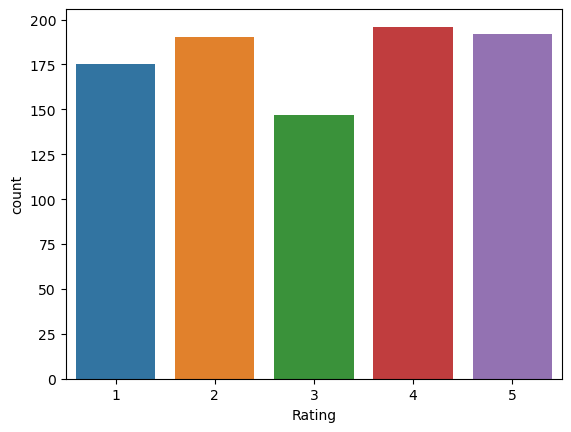

In [34]:
sns.countplot(x="Rating",data=df)

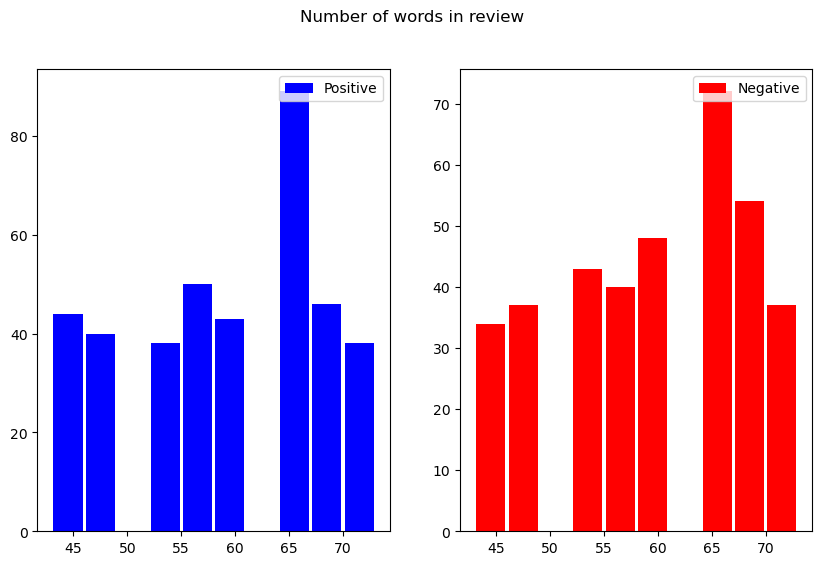

In [261]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df['Sentiment']=='1']['length'],label='Positive',color='blue',rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['Sentiment']=='0']['length'],label='Negative',color='red',rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

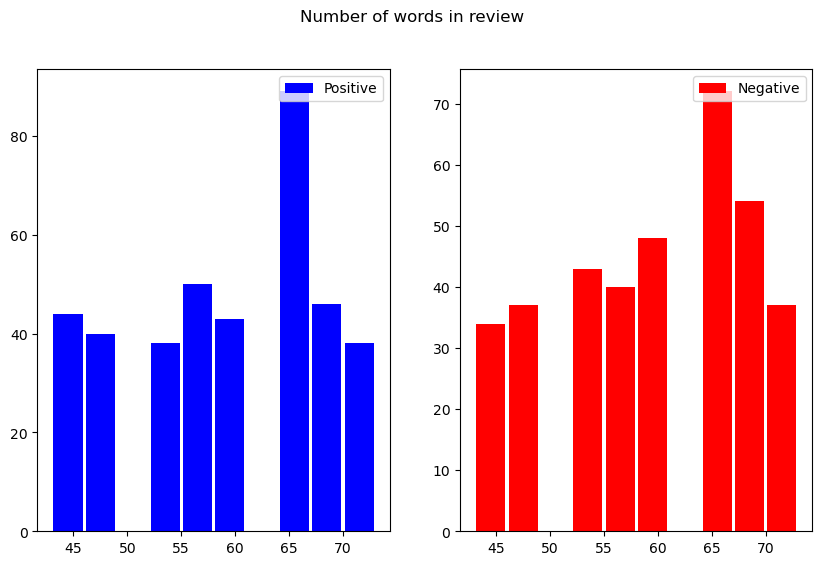

In [262]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df['Sentiment']=='1']['Review_Text'].str.len(),label='Positive',color='blue',rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['Sentiment']=='0']['Review_Text'].str.len(),label='Negative',color='red',rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

In [274]:
df['word_count']=df['cleaned'].apply(len)
df.head(25)

,Review_Text,Rating,length,tokenized_reviews,stopwords_removed,punct_removed,lemmatized,cleaned,Sentiment,word_count
0,i have mixed feelings about my experience.,4,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,1,24
1,the staff was caring and attentive. i couldn't...,5,59,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, could, n't, happier]","[staff, caring, attentive, could, n't, happier]",staff caring attentive could n't happier,1,40
2,i have mixed feelings about my experience.,5,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,1,24
3,i have mixed feelings about my experience.,5,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,1,24
4,the healthcare provider was excellent. i had a...,3,65,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex...","[healthcare, provider, excellent, great, exper...","[healthcare, provider, excellent, great, exper...",healthcare provider excellent great experience,2,46
5,the staff was caring and attentive. i couldn't...,4,59,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, could, n't, happier]","[staff, caring, attentive, could, n't, happier]",staff caring attentive could n't happier,1,40
7,i had a bad experience with this healthcare pr...,2,73,"[i, had, a, bad, experience, with, this, healt...","[bad, experience, healthcare, provider, ., avo...","[bad, experience, healthcare, provider, avoid,...","[bad, experience, healthcare, provider, avoid,...",bad experience healthcare provider avoid possible,0,49
8,i have mixed feelings about my experience.,3,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,2,24
9,i have mixed feelings about my experience.,5,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,1,24
10,"the service was okay, but nothing exceptional.",1,47,"[the, service, was, okay, ,, but, nothing, exc...","[service, okay, ,, nothing, exceptional, .]","[service, okay, nothing, exceptional]","[service, okay, nothing, exceptional]",service okay nothing exceptional,0,32


In [40]:
sentiment_count=df['Sentiment'].value_counts()
sentiment_count

Sentiment
1    388
0    365
2    147
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

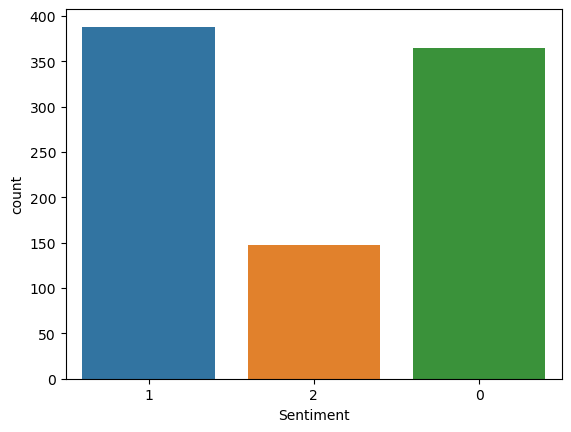

In [270]:
sns.countplot(x="Sentiment",data=df)

In [43]:
df.dtypes

Review_Text          object
Rating                int64
length                int64
tokenized_reviews    object
stopwords_removed    object
punct_removed        object
lemmatized           object
cleaned              object
Sentiment             int64
dtype: object

In [42]:
df['Sentiment']=df['Sentiment'].astype('int64')

In [44]:
pos_review=df[df['Sentiment']==1]
pos_review.shape

(388, 9)

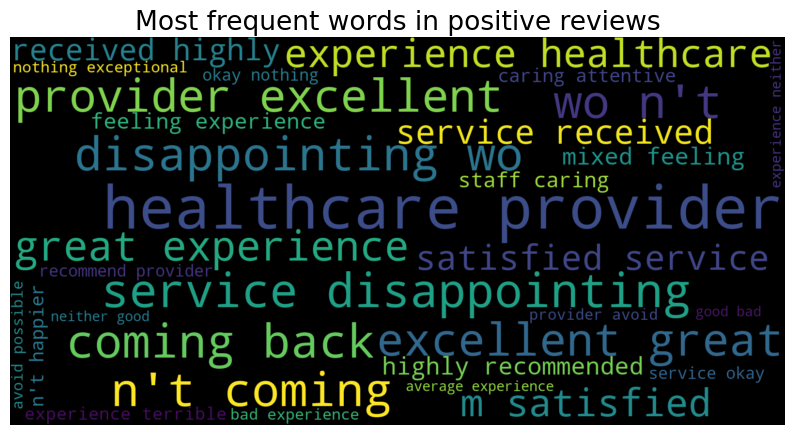

In [45]:
text=" ".join([word for word in pos_review['cleaned']])
plt.figure(figsize=(10,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in positive reviews",fontsize=19)
plt.show()

In [50]:
neg_review=df[df['Sentiment']==0]
neg_review.head()
neg_review.shape

(365, 9)

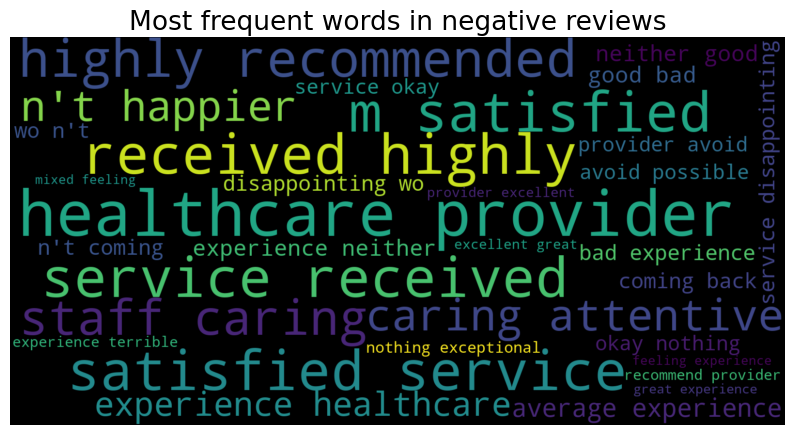

In [51]:
text=" ".join([word for word in neg_review['cleaned']])
plt.figure(figsize=(10,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in negative reviews",fontsize=19)
plt.show()

In [53]:
neutral_review=df[df['Sentiment']==2]
neutral_review.shape

(147, 9)

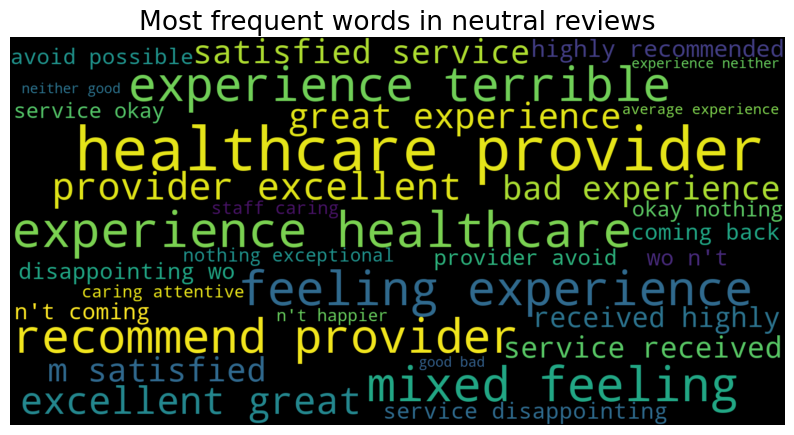

In [54]:
text=" ".join([word for word in neutral_review['cleaned']])
plt.figure(figsize=(10,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in neutral reviews",fontsize=19)
plt.show()

In [69]:
df.to_csv('finalsenti.csv', index = False)

In [70]:
df.shape

(900, 10)

In [74]:
temp_df= df.query('Sentiment==0')
temp_df

,Review_Text,Rating,length,tokenized_reviews,stopwords_removed,punct_removed,lemmatized,cleaned,Sentiment,rating
7,i had a bad experience with this healthcare pr...,2,73,"[i, had, a, bad, experience, with, this, healt...","[bad, experience, healthcare, provider, ., avo...","[bad, experience, healthcare, provider, avoid,...","[bad, experience, healthcare, provider, avoid,...",bad experience healthcare provider avoid possible,0,1.0
10,"the service was okay, but nothing exceptional.",1,47,"[the, service, was, okay, ,, but, nothing, exc...","[service, okay, ,, nothing, exceptional, .]","[service, okay, nothing, exceptional]","[service, okay, nothing, exceptional]",service okay nothing exceptional,0,3.0
14,i had a bad experience with this healthcare pr...,2,73,"[i, had, a, bad, experience, with, this, healt...","[bad, experience, healthcare, provider, ., avo...","[bad, experience, healthcare, provider, avoid,...","[bad, experience, healthcare, provider, avoid,...",bad experience healthcare provider avoid possible,0,1.0
19,the service was disappointing. i won't be comi...,1,55,"[the, service, was, disappointing, ., i, wo, n...","[service, disappointing, ., wo, n't, coming, b...","[service, disappointing, wo, n't, coming, back]","[service, disappointing, wo, n't, coming, back]",service thisappointing would not coming back,0,3.0
21,i'm very satisfied with the service i received...,1,68,"[i, 'm, very, satisfied, with, the, service, i...","['m, satisfied, service, received, ., highly, ...","['m, satisfied, service, received, highly, rec...","['m, satisfied, service, received, highly, rec...",am satisfied service received highly recommended,0,5.0
...,...,...,...,...,...,...,...,...,...,...
980,"the service was okay, but nothing exceptional.",2,47,"[the, service, was, okay, ,, but, nothing, exc...","[service, okay, ,, nothing, exceptional, .]","[service, okay, nothing, exceptional]","[service, okay, nothing, exceptional]",service okay nothing exceptional,0,3.0
981,i'm very satisfied with the service i received...,2,68,"[i, 'm, very, satisfied, with, the, service, i...","['m, satisfied, service, received, ., highly, ...","['m, satisfied, service, received, highly, rec...","['m, satisfied, service, received, highly, rec...",am satisfied service received highly recommended,0,5.0
985,the staff was caring and attentive. i couldn't...,2,59,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, could, n't, happier]","[staff, caring, attentive, could, n't, happier]",staff caring attentive could not happier,0,1.0
992,the service was disappointing. i won't be comi...,1,55,"[the, service, was, disappointing, ., i, wo, n...","[service, disappointing, ., wo, n't, coming, b...","[service, disappointing, wo, n't, coming, back]","[service, disappointing, wo, n't, coming, back]",service thisappointing would not coming back,0,3.0


In [65]:
contractions = {
 "'m":"am",   
 "ain't": "am not",
 "aren't": "are not",
 "can't": "cannot",
 "can't've": "cannot have",
 "'cause": "because",
 "could've": "could have",
 "couldn't": "could not",
 "could n't": "could not",
 "couldn't've": "could not have",
 "didn't": "did not",
 "doesn't": "does not",
 "don't": "do not",
 "hadn't": "had not",
 "hadn't've": "had not have",
 "hasn't": "has not",
 "haven't": "have not",
 "he'd": "he would",
 "he'd've": "he would have",
 "he'll": "he will",
 "he'll've": "he will have",
 "he's": "he is",
 "how'd": "how did",
 "how'd'y": "how do you",
 "how'll": "how will",
 "how's": "how does",
 "i'd": "i would",
 "i'd've": "i would have",
 "i'll": "i will",
 "i'll've": "i will have",
 "i'm": "i am",
 "i've": "i have",
 "isn't": "is not",
 "it'd": "it would",
 "it'd've": "it would have",
 "it'll": "it will",
 "it'll've": "it will have",
 "it's": "it is",
 "let's": "let us",
 "ma'am": "madam",
 "mayn't": "may not",
 "might've": "might have",
 "mightn't": "might not",
 "mightn't've": "might not have",
 "must've": "must have",
 "mustn't": "must not",
 "mustn't've": "must not have",
 "needn't": "need not",
 "needn't've": "need not have",
 "o'clock": "of the clock",
 "oughtn't": "ought not",
 "oughtn't've": "ought not have",
 "shan't": "shall not",
 "sha'n't": "shall not",
 "shan't've": "shall not have",
 "she'd": "she would",
 "she'd've": "she would have",
 "she'll": "she will",
 "she'll've": "she will have",
 "she's": "she is",
 "should've": "should have",
 "shouldn't": "should not",
 "shouldn't've": "should not have",
 "so've": "so have",
 "so's": "so is",
 "that'd": "that would",
 "that'd've": "that would have",
 "that's": "that is",
 "there'd": "there would",
 "there'd've": "there would have",
 "there's": "there is",
 "they'd": "they would",
 "they'd've": "they would have",
 "they'll": "they will",
 "they'll've": "they will have",
 "they're": "they are",
 "they've": "they have",
 "to've": "to have",
 "wasn't": "was not",
 " u ": " you ",
 " ur ": " your ",
 " n ": " and ",
 "won't": "would not",
 "wo n't":"would not",
 'dis': 'this',
 'bak': 'back',
 'brng': 'bring',
 "won't":"would not",
  'dis':'this',
 "bak":"back",
 "brng":'bring',
 "i'v" : 'i have'
 }

In [66]:
def expand(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [68]:
df['cleaned'] = df['cleaned'].apply(lambda x : expand(x))
df.head(35)

,Review_Text,Rating,length,tokenized_reviews,stopwords_removed,punct_removed,lemmatized,cleaned,Sentiment,rating
0,i have mixed feelings about my experience.,4,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,1,3.0
1,the staff was caring and attentive. i couldn't...,5,59,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, could, n't, happier]","[staff, caring, attentive, could, n't, happier]",staff caring attentive could not happier,1,1.0
2,i have mixed feelings about my experience.,5,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,1,3.0
3,i have mixed feelings about my experience.,5,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,1,3.0
4,the healthcare provider was excellent. i had a...,3,65,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex...","[healthcare, provider, excellent, great, exper...","[healthcare, provider, excellent, great, exper...",healthcare provider excellent great experience,2,5.0
5,the staff was caring and attentive. i couldn't...,4,59,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, could, n't, happier]","[staff, caring, attentive, could, n't, happier]",staff caring attentive could not happier,1,1.0
7,i had a bad experience with this healthcare pr...,2,73,"[i, had, a, bad, experience, with, this, healt...","[bad, experience, healthcare, provider, ., avo...","[bad, experience, healthcare, provider, avoid,...","[bad, experience, healthcare, provider, avoid,...",bad experience healthcare provider avoid possible,0,1.0
8,i have mixed feelings about my experience.,3,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,2,3.0
9,i have mixed feelings about my experience.,5,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,1,3.0
10,"the service was okay, but nothing exceptional.",1,47,"[the, service, was, okay, ,, but, nothing, exc...","[service, okay, ,, nothing, exceptional, .]","[service, okay, nothing, exceptional]","[service, okay, nothing, exceptional]",service okay nothing exceptional,0,3.0


In [62]:
def get_sentiment(review):
    # Define positive and negative keywords
    positive_keywords = ['great', 'awesome', 'good','satisfied','excellent', 'great experience','highly recommended','recommend']
    negative_keywords = ['avoid','bad','disappointing','not satisfied', 'not recommended', 'poor quality','terrible','not happier']
    
    # Check if review contains positive or negative keywords
    if any(keyword in review.lower() for keyword in positive_keywords):
        return 'positive'
    elif any(keyword in review.lower() for keyword in negative_keywords):
        return 'negative'
    else:
        return 'neutral'

def update_ratings(df):
    # Apply sentiment analysis to each review
    df['sentiment1'] = df['cleaned'].apply(get_sentiment)
    
    # Update ratings based on sentiment
    df.loc[df['sentiment1'] == 'positive', 'rating'] = 5
    df.loc[df['sentiment1'] == 'negative', 'rating'] = 1
    df.loc[df['sentiment1'] == 'neutral', 'rating'] = 3
    
    # Drop the 'sentiment' column
    df.drop(columns=['sentiment1'], inplace=True)
    
    return df

def remove_duplicate_reviews(df):
    # Drop duplicates based on review_text
    unique_df = df.drop_duplicates(subset=['cleaned'])
    
    return unique_df

# Update ratings based on sentiment
updated_df = update_ratings(df)

# Remove duplicate reviews
unique_reviews_df = remove_duplicate_reviews(updated_df)

# print("Original DataFrame:")
# print(df.head())
# print("\nDataFrame after updating ratings based on sentiment:")
# print(updated_df.head())
print("\nDataFrame after removing duplicate reviews:")
unique_reviews_df.head(10)



DataFrame after removing duplicate reviews:


,Review_Text,Rating,length,tokenized_reviews,stopwords_removed,punct_removed,lemmatized,cleaned,Sentiment,rating
0,i have mixed feelings about my experience.,4,43,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience,1,3.0
1,the staff was caring and attentive. i couldn't...,5,59,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, could, n't, happier]","[staff, caring, attentive, could, n't, happier]",staff caring attentive could not happier,1,1.0
4,the healthcare provider was excellent. i had a...,3,65,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex...","[healthcare, provider, excellent, great, exper...","[healthcare, provider, excellent, great, exper...",healthcare provider excellent great experience,2,5.0
7,i had a bad experience with this healthcare pr...,2,73,"[i, had, a, bad, experience, with, this, healt...","[bad, experience, healthcare, provider, ., avo...","[bad, experience, healthcare, provider, avoid,...","[bad, experience, healthcare, provider, avoid,...",bad experience healthcare provider avoid possible,0,1.0
10,"the service was okay, but nothing exceptional.",1,47,"[the, service, was, okay, ,, but, nothing, exc...","[service, okay, ,, nothing, exceptional, .]","[service, okay, nothing, exceptional]","[service, okay, nothing, exceptional]",service okay nothing exceptional,0,3.0
17,my experience was terrible. i would not recomm...,5,65,"[my, experience, was, terrible, ., i, would, n...","[experience, terrible, ., would, recommend, pr...","[experience, terrible, would, recommend, provi...","[experience, terrible, would, recommend, provi...",experience terrible would recommend provider,1,5.0
19,the service was disappointing. i won't be comi...,1,55,"[the, service, was, disappointing, ., i, wo, n...","[service, disappointing, ., wo, n't, coming, b...","[service, disappointing, wo, n't, coming, back]","[service, disappointing, wo, n't, coming, back]",service thisappointing would not coming back,0,3.0
21,i'm very satisfied with the service i received...,1,68,"[i, 'm, very, satisfied, with, the, service, i...","['m, satisfied, service, received, ., highly, ...","['m, satisfied, service, received, highly, rec...","['m, satisfied, service, received, highly, rec...",am satisfied service received highly recommended,0,5.0
29,it was an average experience. neither good nor...,4,52,"[it, was, an, average, experience, ., neither,...","[average, experience, ., neither, good, bad, .]","[average, experience, neither, good, bad]","[average, experience, neither, good, bad]",average experience neither good bad,1,5.0


In [64]:
grouped = unique_reviews_df.groupby(['cleaned', 'Sentiment']).size().reset_index(name='count')
grouped

,cleaned,Sentiment,count
0,am satisfied service received highly recommended,0,1
1,average experience neither good bad,1,1
2,bad experience healthcare provider avoid possible,0,1
3,experience terrible would recommend provider,1,1
4,healthcare provider excellent great experience,2,1
5,mixed feeling experience,1,1
6,service okay nothing exceptional,0,1
7,service thisappointing would not coming back,0,1
8,staff caring attentive could not happier,1,1


In [397]:
unique_reviews_df['cleaned'].duplicated().sum()

0

In [398]:
unique_reviews_df['rating'].value_counts()

rating
3.0    3
1.0    3
5.0    3
Name: count, dtype: int64

In [401]:
final_model_data=unique_reviews_df[['cleaned','rating']].copy()
final_model_data


,cleaned,rating
0,mixed feeling experience,3.0
1,staff caring attentive could not happier,1.0
4,healthcare provider excellent great experience,5.0
7,bad experience healthcare provider avoid possible,1.0
10,service okay nothing exceptional,3.0
17,experience terrible would recommend provider,1.0
19,service thisappointing would not coming back,3.0
21,am satisfied service received highly recommended,5.0
29,average experience neither good bad,5.0


In [404]:
# df['Sentiment'] = '0'
final_model_data.loc[df['rating'] ==5.0, 'Sentiment'] = '1'
final_model_data.loc[df['rating'] ==3.0, 'Sentiment'] = '2'
final_model_data.loc[df['rating'] ==1.0, 'Sentiment'] = '0'
final_model_data

,cleaned,rating,Sentiment
0,mixed feeling experience,3.0,2
1,staff caring attentive could not happier,1.0,0
4,healthcare provider excellent great experience,5.0,1
7,bad experience healthcare provider avoid possible,1.0,0
10,service okay nothing exceptional,3.0,2
17,experience terrible would recommend provider,1.0,0
19,service thisappointing would not coming back,3.0,2
21,am satisfied service received highly recommended,5.0,1
29,average experience neither good bad,5.0,1


In [409]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(final_model_data['cleaned'])


In [ ]:
#Model Building

In [444]:
X=df['cleaned'].values
y=df['Sentiment'].values

In [445]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [446]:
print('X_train='+str(len(X_train)))
print('X_test='+str(len(X_test)))

X_train=675
X_test=225


In [447]:
print('y_train='+str(len(y_train)))
print('y_test='+str(len(y_test)))

y_train=675
y_test=225


In [448]:
cv = CountVectorizer(ngram_range=(1,2))

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [449]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [450]:
print("y_train, counts of label '1': {}".format(np.count_nonzero(y_train == 1))) 
print("y_train, counts of label '2': {}".format(np.count_nonzero(y_train == 2))) 
print("y_train, counts of label '0': {}".format(np.count_nonzero(y_train == 0))) 

y_train, counts of label '1': 290
y_train, counts of label '2': 116
y_train, counts of label '0': 269


In [451]:
print("y_test, counts of label '1': {}".format(np.count_nonzero(y_test == 1))) 
print("y_test, counts of label '2': {}".format(np.count_nonzero(y_test == 2))) 
print("y_test, counts of label '0': {}".format(np.count_nonzero(y_test == 0))) 

y_test, counts of label '1': 98
y_test, counts of label '2': 31
y_test, counts of label '0': 96


In [452]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
log_reg_clf=LogisticRegression()
log_reg_clf.fit(X_train_cv, y_train)

LogisticRegression()

In [453]:
y_pred=log_reg_clf.predict(X_test_cv)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[42 54  0]
 [45 53  0]
 [ 8 23  0]]
0.4222222222222222


In [454]:
random_forest_classifier=RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train_cv,y_train)
RandomForestClassifier()
y_pred=random_forest_classifier.predict(X_test_cv)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[42 54  0]
 [45 53  0]
 [ 8 23  0]]
0.4222222222222222


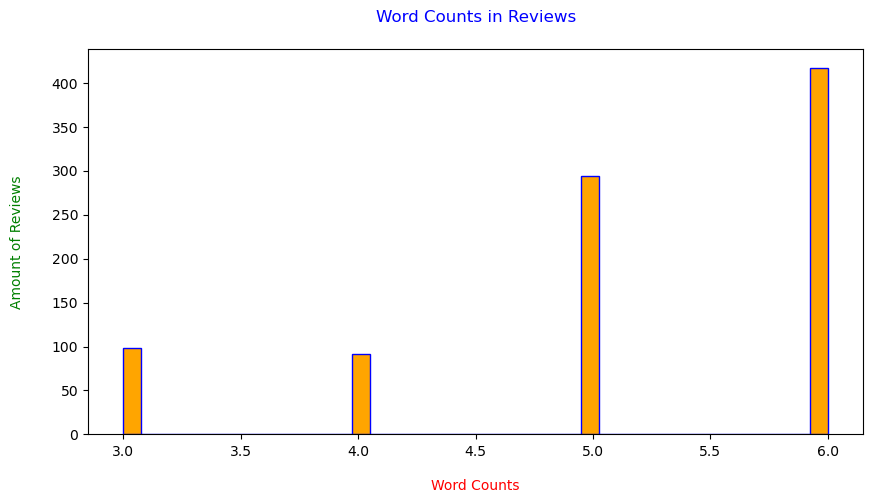

In [457]:
df["word_counts"] = df["cleaned"].apply(lambda x: len(str(x).split()))
df["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()
     

In [462]:
# N-Gram Analysis
# N-Gram Function


def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = stop_words, ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

In [460]:
#Filter The DataFrame Based On Sentiments


# Use dropna() so the base DataFrame is not affected
Positive = df[df["Sentiment"] == 1].dropna()
Neutral = df[df["Sentiment"] == 2].dropna()
Negative = df[df["Sentiment"] == 0].dropna()

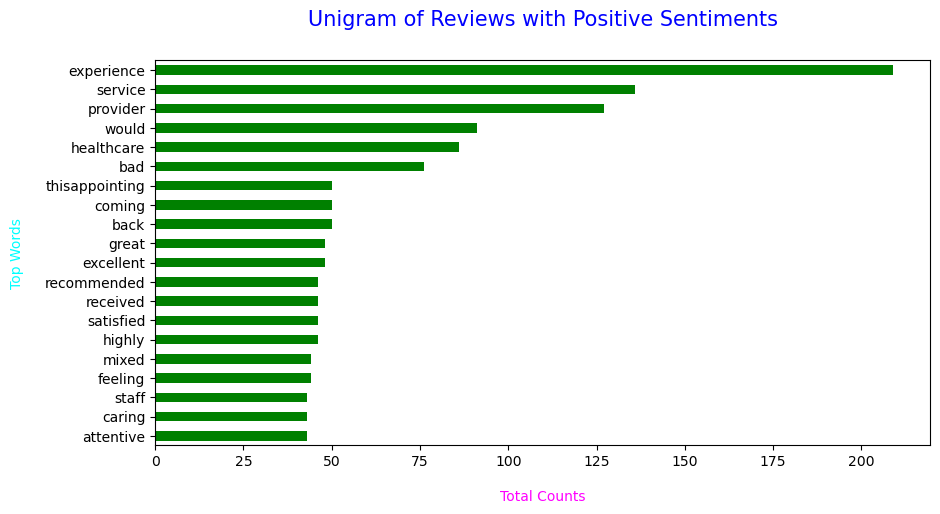

In [463]:
# Finding Unigram
words = Gram_Analysis(Positive["cleaned"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

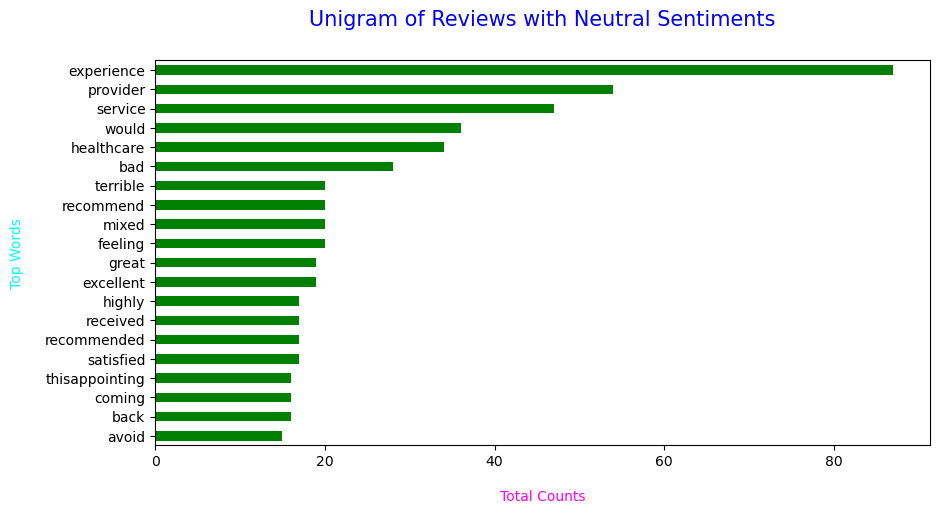

In [465]:
# Finding Unigram
words = Gram_Analysis(Neutral["cleaned"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

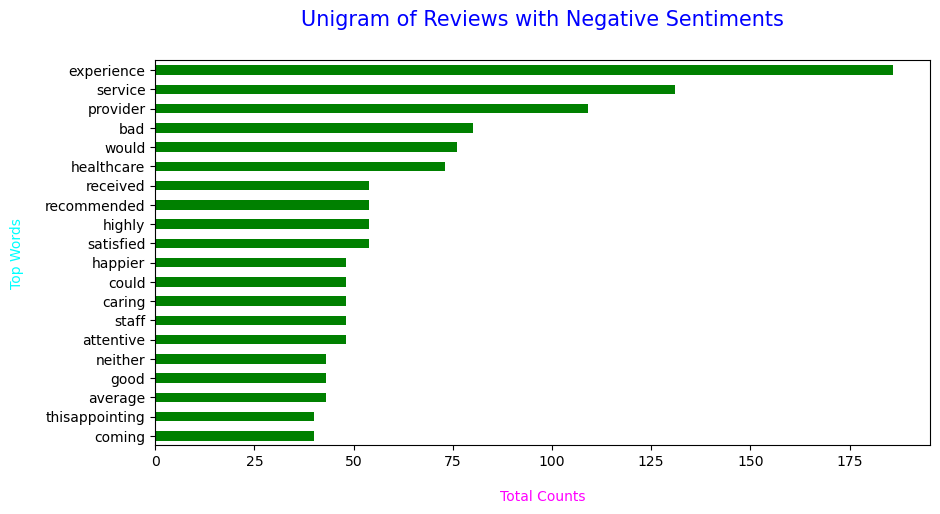

In [466]:
# Finding Unigram
words = Gram_Analysis(Negative["cleaned"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

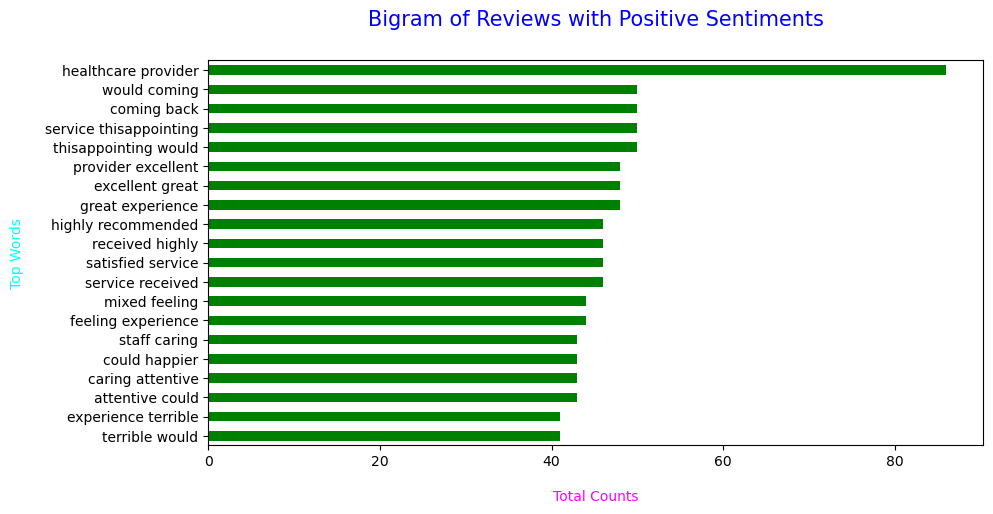

In [467]:
# Finding Bigram
words = Gram_Analysis(Positive["cleaned"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

In [488]:

#TF-IDF Vectorizer


# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (3, 3))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["cleaned"])

# Check our matrix shape
X.shape


(900, 28)

In [489]:
# Declaring our target variable
y = df["Sentiment"]

In [490]:
Counter(y)

Counter({1: 388, 0: 365, 2: 147})

In [491]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))
     

Decision Tree Test Accuracy: 0.4344444444444445
Logistic Regression Test Accuracy: 0.43
SVC Test Accuracy: 0.43
Random Forest Test Accuracy: 0.4255555555555556
Naive Bayes Test Accuracy: 0.41222222222222216
K-Neighbors Test Accuracy: 0.4133333333333334
